## 3.0 웹 점착성 p. 121

Time 열의 평균 :  0.3566666666666669
-0.0856190476190477


C:\Users\User\AppData\Local\Temp\ipykernel_16544\3088505673.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\3088505673.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()


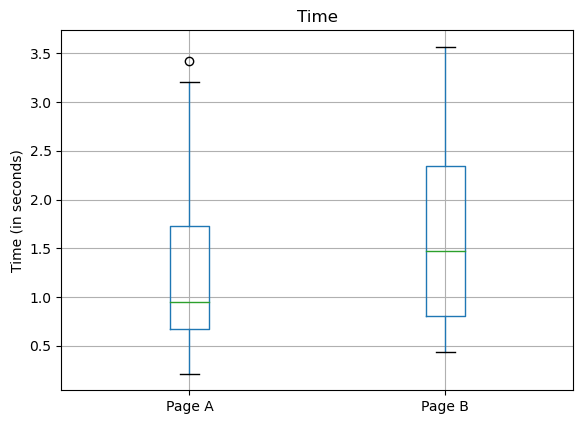

In [4]:
import pandas as pd
import matplotlib.pylab as plt
import random
import numpy as np

session_times = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/web_page_data.csv")

# ggplot을 이용한 상자그림을 통해 세션시간 비교 p. 121
ax = session_times.boxplot(by = 'Page', column = 'Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

# Time 열의 평균구하기 
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print('Time 열의 평균 : ', mean_b - mean_a) 

# 순열검정
# perm_fun : 비복원추출 방식으로 nb개의 표본을 추출후 그룹b에 할당, 나머지는 a할당
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning:

0.029809523809523508


C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning:

0.134

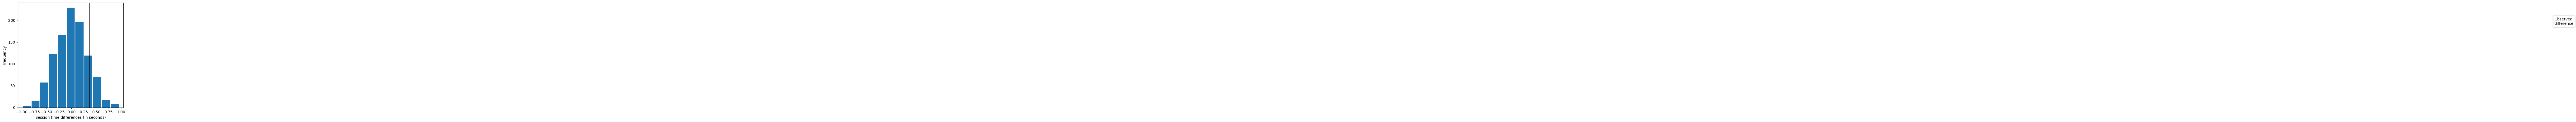

In [5]:
# 순열검정
# perm_fun : 비복원추출 방식으로 nb개의 표본을 추출후 그룹b에 할당, 나머지는 a할당
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

# 세션 시간의 차이를 히스토그램으로 표시
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_b - mean_a, color = 'black', lw = 2)
ax.text(50, 190, 'Observed\ndifference', bbox = {'facecolor' : 'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency') 

# 발생확률 # 난수를 사용하여 시뮬레이션의 결과가 달라질 수 있음 -> 13.4%
np.mean(np.array(perm_diffs) > mean_b - mean_a)

## 통계적 유의성과 P값 p. 128

Observed difference: 0.0368%


C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_16544\1082429967.py:7: FutureWarning:

Text(0, 0.5, 'Frequency')

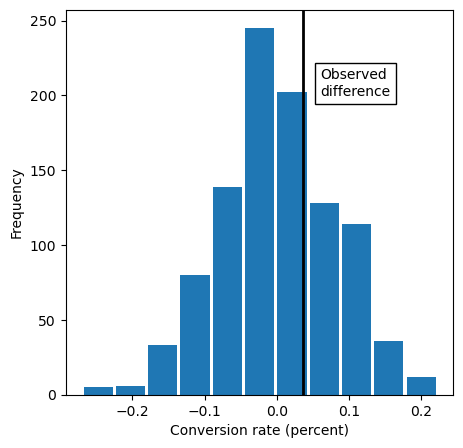

In [9]:

#무작위로 순열 추출한 전환율 차이에 대한 히스토그램
obs_pct_diff = 100 * (200 /  23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588)
              for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = obs_pct_diff, color = 'black', lw = 2)
ax.text(0.06, 200, 'Observed\ndifference', bbox = {'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

## p값, t 검정 p. 130, 135

In [15]:
import numpy as np
from scipy import stats     # 통계 분석을 위한 scipy 모듈의 stats 서브모듈

# p 값
survivors = np.array([[200, 23739 -200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)        # 카이제곱 독립성 검정 실행 및 결과 반환

print(f'p-value for single sided test: {p_value / 2:.4f}')      # p-value를 2로 나누어 양측 검정 대신 한 쪽 검정 결과로 출력


# t.test
# stats.ttest_ind() 함수를 사용하여 독립표본 t-검정을 실행하고 결과를 res 변수에 저장
# res는 Ttest_indResult 객체이며, 그 안에 t-통계량과 p-값이 포함
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,      
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)

# p-값을 출력. 이때 p-값을 양측 검정이 아닌 한 쪽 검정 결과로 출력하기 위해 2로 나누어 출력
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') 

p-value for single sided test: 0.3498
p-value for single sided test: 0.1408
